In [2]:
pip install praw

In [3]:
import praw

In [4]:
reddit = praw.Reddit(
    client_id = "R355m7jOp6-TswgScCzkvQ",
    client_secret ="9D3hVOcM4WmXCa8uytGOfT_6_BqbRg",
    user_agent = "my-app by u/Brilliant_Sock_2545 ",
    username = "Brilliant_Sock_2545",
    password ="Password",

)

In [5]:
subreddit = reddit.subreddit("python")

In [6]:
top_posts = subreddit.top(limit = 10)
new_posts = subreddit.new(limit = 10)

for post in top_posts:
    print("Title -", post.title)
    print("ID-", post.id)
    print("Author -", post.author)
    print("URL - ", post.url)
    print("Score - ", post.score)
    print("Comment count - ", post.num_comments)
    print("Created - ", post.created_utc)
    print("\n")   
    print("*********************************************")

Title - Lad wrote a Python script to download Alexa voice recordings, he didn't expect this email.
ID- g53lxf
Author - iEslam
URL -  https://i.redd.it/2s0dj8ob12u41.png
Score -  12345
Comment count -  133
Created -  1587424299.0


*********************************************
Title - This post has:
ID- hoolsm
Author - Krukerfluk
URL -  https://www.reddit.com/r/Python/comments/hoolsm/this_post_has/
Score -  9232
Comment count -  435
Created -  1594386373.0


*********************************************
Title - I redesign the Python logo to make it more modern
ID- gftejm
Author - jessjwilliamson
URL -  https://i.redd.it/rxezjyf4ojx41.png
Score -  7863
Comment count -  265
Created -  1588945149.0


*********************************************
Title - Automate the boring stuff with python - tinder
ID- 7kpme8
Author - backprop88
URL -  https://gfycat.com/PointlessSimplisticAmericanquarterhorse
Score -  6724
Comment count -  325
Created -  1513644476.0


***********************************

In [7]:
post = reddit.submission(id = "hqc7ol")

comments = post.comments

for comment in comments[:2]:
    print("Printing comment...")
    print("Comment body- ", comment.body)
    print("Author -" , comment.author)
    print("\n")

Printing comment...
Comment body-  It would be great to show an animation example of how the trained model performs on an unseen track.
Author - DmitryBalabka


Printing comment...
Comment body-  [Longer version on Youtube](https://youtu.be/B0ptl-NChJQ)

Tools:

* pyglet for graphics
* numpy for nn

EDIT:

Thank you guys for all the feedback! This is my first bigger programming project and  I'm glad you like it.

* There is a lot of source code requests and I am currently working on it. My code is a mess because I never really thought I would share this project with someone. Its also written in czech :D When I'm done, **I'll make another post.**
* To train the NN I used a simple evolutionary algorithm. Best (fastest) cars in each generation are chosen to be parents of next slightly mutated generation. The NN has 2 hidden layers (5x4x4x2)
* I will also train the NN on other tracks.

**EDIT 2:**

[**GITHUB REPO**](https://github.com/aTom995/NeuralNetworkRacing)
Author - atqm-




In [8]:
from collections import Counter
import re

In [9]:
#KELİME FREKANSI

# Add a username
username = 'Brilliant_Sock_2545'

# collect user's comments and responses 
user = reddit.redditor(username)
posts = user.submissions.new(limit=None)
comments = user.comments.new(limit=None)

# merge all text from comments and responses
all_texts = ''
for post in posts:
    all_texts += post.title + ' ' + post.selftext + ' '
for comment in comments:
    all_texts += comment.body + ' '

words = re.findall(r'\b\w+\b', all_texts.lower())
word_counts = Counter(words)

# word frequency
for word, count in word_counts.most_common(20):
    print(f'{word}: {count}')

ve: 53
veri: 37
makine: 28
öğrenmesi: 25
bu: 17
gibi: 14
bilimi: 11
için: 10
analizi: 9
büyük: 8
analiz: 7
bir: 6
alanda: 6
sektöründe: 6
görselleştirme: 5
sağlık: 5
olan: 5
elde: 4
i: 4
fırsatlar: 4


C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


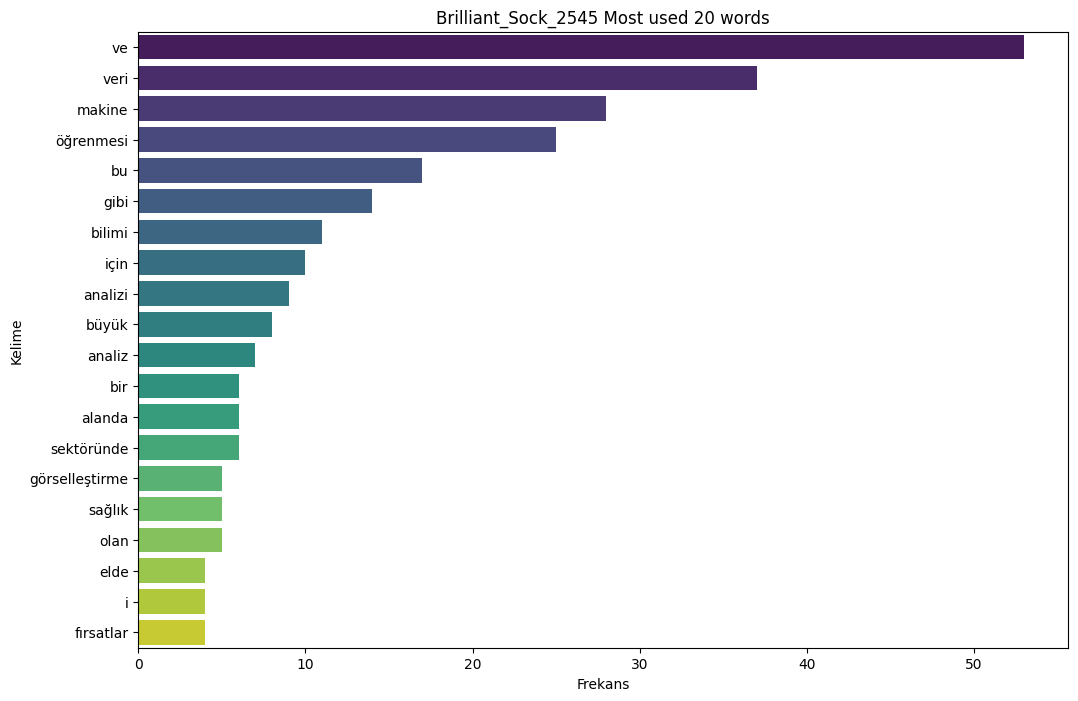

In [10]:
#Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# add username
username = 'Brilliant_Sock_2545'

# collect all user's posts and comments
user = reddit.redditor(username)
posts = user.submissions.new(limit=None)
comments = user.comments.new(limit=None)

#  merge all texts from comments and posts
all_texts = ''
for post in posts:
    all_texts += post.title + ' ' + post.selftext + ' '
for comment in comments:
    all_texts += comment.body + ' '

# split and clean words process
words = re.findall(r'\b\w+\b', all_texts.lower())
word_counts = Counter(words)

# take the most frequency 20 words 
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)

# Vissualization word frequency
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.xlabel('Frekans')
plt.ylabel('Kelime')
plt.title(f'{username} Most used 20 words')
plt.show()

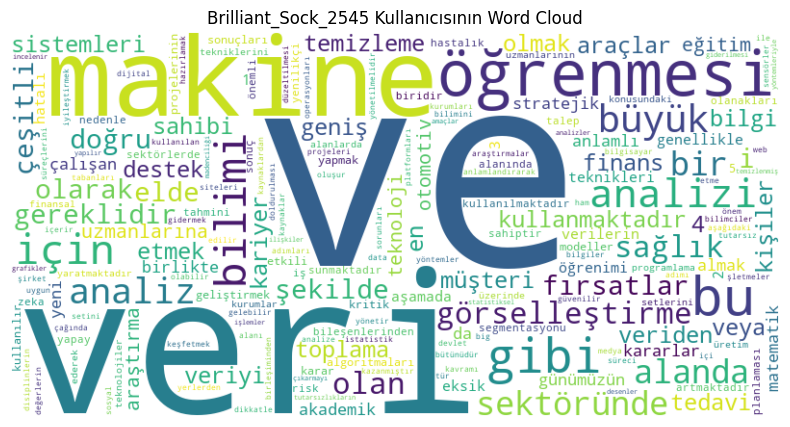

In [11]:
#Vissualization with wordcloud

from wordcloud import WordCloud 

username = 'Brilliant_Sock_2545'

# collect all user's comments and post as text
user = reddit.redditor(username)
posts = user.submissions.new(limit=None)
comments = user.comments.new(limit=None)

# Merge all collected text
all_texts = ''
for post in posts:
    all_texts += post.title + ' ' + post.selftext + ' '
for comment in comments:
    all_texts += comment.body + ' '

# Split and clean process
words = re.findall(r'\b\w+\b', all_texts.lower())
word_counts = Counter(words)

# create wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Vissualizate wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'{username} Kullanıcısının Word Cloud')
plt.show()

In [12]:
pip install wordcloud matplotlib numpy pillow


Note: you may need to restart the kernel to use updated packages.


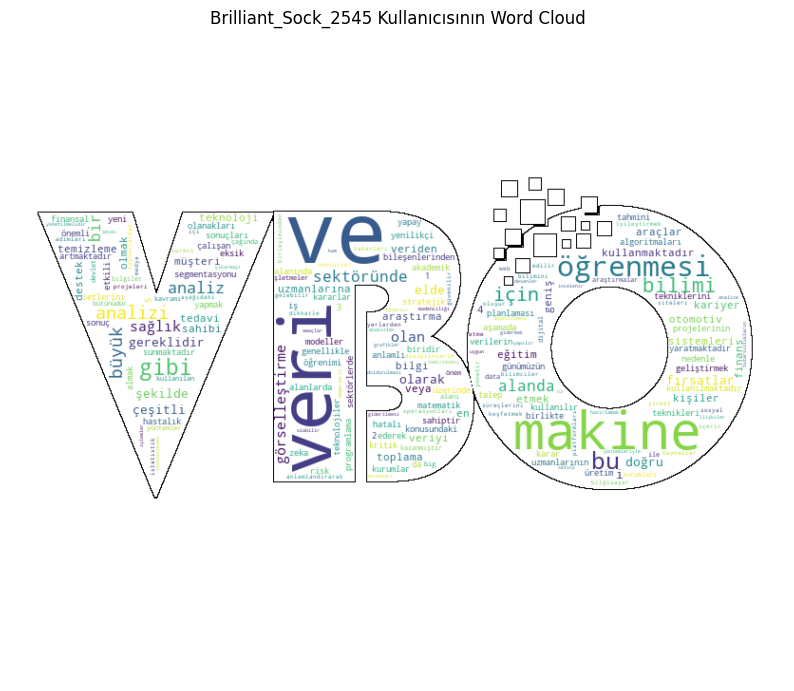

In [13]:
import numpy as np
from PIL import Image

username = 'Brilliant_Sock_2545'

user = reddit.redditor(username)
posts = user.submissions.new(limit=None)
comments = user.comments.new(limit=None)

all_texts = ''
for post in posts:
    all_texts += post.title + ' ' + post.selftext + ' '
for comment in comments:
    all_texts += comment.body + ' '

words = re.findall(r'\b\w+\b', all_texts.lower())
word_counts = Counter(words)

# add png file
mask_image_path = 'vbo-share.png'
mask_image = np.array(Image.open(mask_image_path))

# word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', mask=mask_image, contour_width=1, contour_color='black').generate_from_frequencies(word_counts)

# vissualite wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'{username} Kullanıcısının Word Cloud')
plt.show()

In [14]:
pip install textblob vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [16]:
#EMOTİON ANALYZE

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
username = 'Unexpected'

#  collect user's all comment and post as text
user = reddit.redditor(username)
posts = user.submissions.new(limit=None)
comments = user.comments.new(limit=None)

# Emotion Analyze function
def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    return scores['compound'], scores['pos'], scores['neu'], scores['neg']

# Analyze post and comments texts
all_texts = ''
for post in posts:
    all_texts += post.title + ' ' + post.selftext + ' '
for comment in comments:
    all_texts += comment.body + ' '

# Emotion analyze with Vader
compound, pos, neu, neg = analyze_sentiment_vader(all_texts)

# results
print(f'Genel Duygu (Compound): {compound}')
print(f'Pozitif Duygu: {pos}')
print(f'Nötr Duygu: {neu}')
print(f'Negatif Duygu: {neg}')

# Generally emotion
if compound >= 0.05:
    genel_duygu = 'Pozitif'
elif compound <= -0.05:
    genel_duygu = 'Negatif'
else:
    genel_duygu = 'Nötr'

print(f'Genel Duygu Yorumu: {genel_duygu}')

Genel Duygu (Compound): 1.0
Pozitif Duygu: 0.135
Nötr Duygu: 0.788
Negatif Duygu: 0.077
Genel Duygu Yorumu: Pozitif


In [17]:
#Particullarly emotion analyze

from textblob import TextBlob



username = 'Unexpected'

user = reddit.redditor(username)
posts = user.submissions.new(limit=None)
comments = user.comments.new(limit=None)

# emotion analyze dunction
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    return scores['compound'], scores['pos'], scores['neu'], scores['neg']

# analyze text from comments and posts
all_texts = ''
for post in posts:
    all_texts += post.title + ' ' + post.selftext + ' '
for comment in comments:
    all_texts += comment.body + ' '

# emotion analyze with textblob
polarity, subjectivity = analyze_sentiment_textblob(all_texts)
print(f'TextBlob Polarity: {polarity}, Subjectivity: {subjectivity}')

# emotion analyze with vader
compound, pos, neu, neg = analyze_sentiment_vader(all_texts)
print(f'VADER Compound: {compound}, Positive: {pos}, Neutral: {neu}, Negative: {neg}')

TextBlob Polarity: 0.11961980872700215, Subjectivity: 0.48322713833184644
VADER Compound: 1.0, Positive: 0.135, Neutral: 0.788, Negative: 0.077


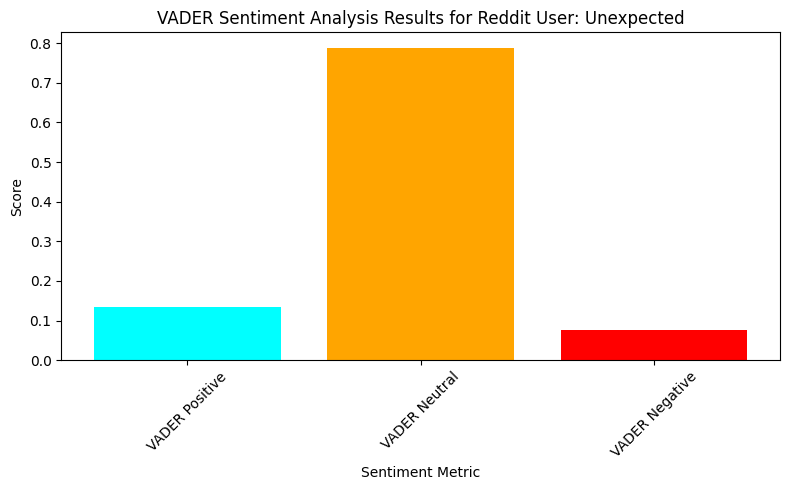

In [22]:
import matplotlib.pyplot as plt

# Kodunuzdan aldığınız VADER duygu analizi sonuçları
vader_compound = compound
vader_pos = pos
vader_neu = neu
vader_neg = neg

# Duygu analizi sonuçlarını görselleştirme
labels = [ 'VADER Positive', 'VADER Neutral', 'VADER Negative']
values = [ vader_pos, vader_neu, vader_neg]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=[ 'cyan', 'orange', 'red'])
plt.title(f'VADER Sentiment Analysis Results for Reddit User: {username}')
plt.xlabel('Sentiment Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


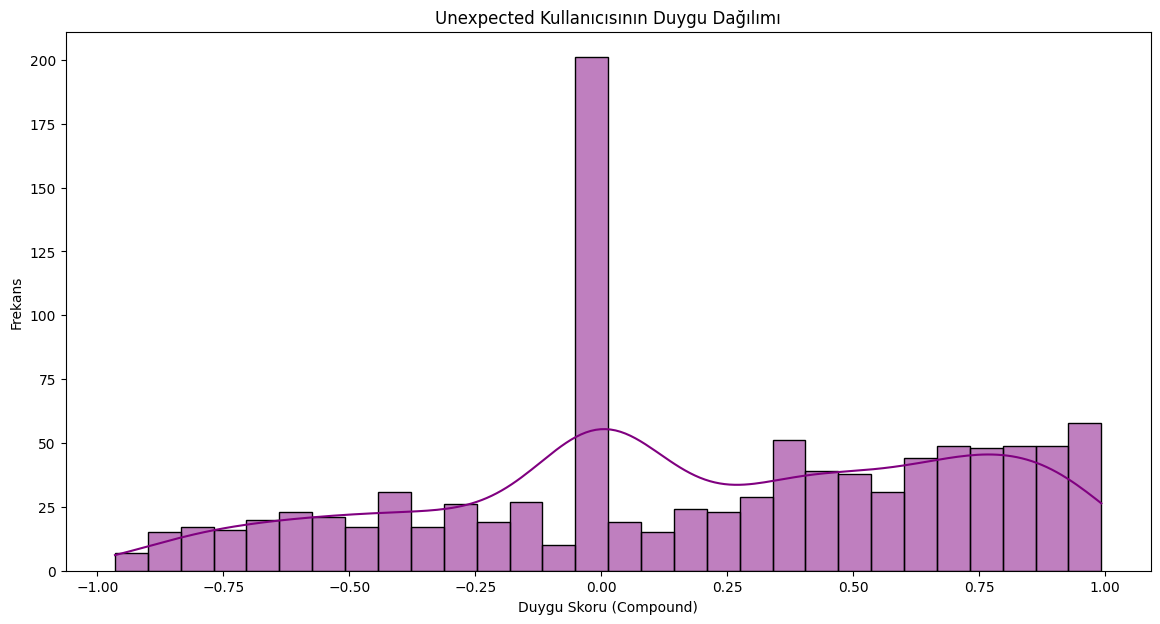

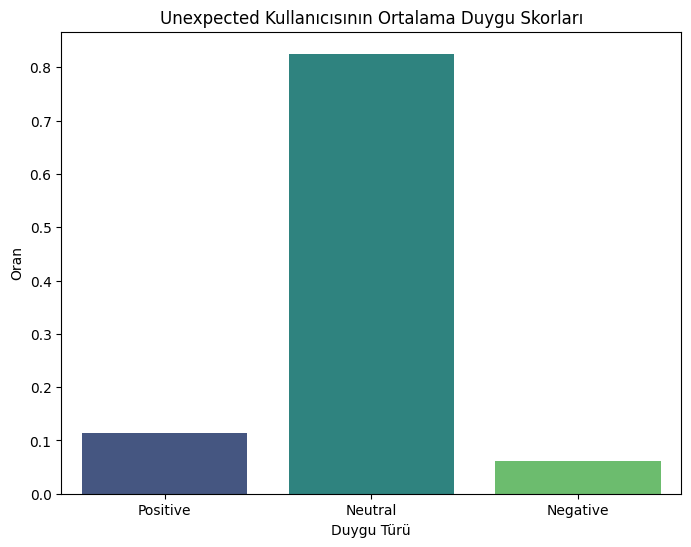

In [20]:
#Visual emotion results

import pandas as pd

username = 'Unexpected'

user = reddit.redditor(username)
posts = user.submissions.new(limit=None)
comments = user.comments.new(limit=None)

# function for emotion analyze
def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    return scores

# Analyze text from posts and comments and collect
results = []
for post in posts:
    sentiment_scores = analyze_sentiment_vader(post.title + ' ' + post.selftext)
    results.append({
        'Type': 'Post',
        'Content': post.title + ' ' + post.selftext,
        'Compound': sentiment_scores['compound'],
        'Positive': sentiment_scores['pos'],
        'Neutral': sentiment_scores['neu'],
        'Negative': sentiment_scores['neg']
    })

for comment in comments:
    sentiment_scores = analyze_sentiment_vader(comment.body)
    results.append({
        'Type': 'Comment',
        'Content': comment.body,
        'Compound': sentiment_scores['compound'],
        'Positive': sentiment_scores['pos'],
        'Neutral': sentiment_scores['neu'],
        'Negative': sentiment_scores['neg']
    })

# convert reults to Dataframe
df = pd.DataFrame(results)

# Vissualite
plt.figure(figsize=(14, 7))
sns.histplot(df, x='Compound', bins=30, kde=True, color='purple')
plt.title(f'{username} Kullanıcısının Duygu Dağılımı')
plt.xlabel('Duygu Skoru (Compound)')
plt.ylabel('Frekans')
plt.show()

# Emotion score(positive, negative, neutral)
df_mean = df[['Positive', 'Neutral', 'Negative']].mean().reset_index()
df_mean.columns = ['Duygu', 'Oran']

plt.figure(figsize=(8, 6))
sns.barplot(x='Duygu', y='Oran', data=df_mean, palette='viridis')
plt.title(f'{username} Kullanıcısının Ortalama Duygu Skorları')
plt.xlabel('Duygu Türü')
plt.ylabel('Oran')
plt.show()